
# Exercise 4 Classification

The goal of this exercise is to learn to evaluate a machine learning model using many classification metrics.

Preliminary:

- Import Breast Cancer data set and split it in a train set and a test set (20%). Fit a linear regression on the data set. *The goal is focus on the metrics, that is why the code to fit the Linear Regression is given.*

```python
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
```

1. Predict on the train set and test set

2. Compute F1, accuracy, precision, recall, roc_auc scores on the train set and test set. Print the confusion matrix on the test set results.

**Note: AUC can only be computed on probabilities, not on classes.**

3. Plot the AUC curve for on the test set using roc_curve of scikit learn. There many ways to create this plot. It should look like this:

![alt text][logo_ex4]

[logo_ex4]: images/day4/ex4/w2_day4_ex4_q3.png "ROC AUC "

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html


[1 0 1 1 1 0 0 1 1 0]
[1 1 0 0 0 1 1 1 0 0]
----------------
f1 score train 0.9911504424778761
accuracy train 0.989010989010989
recall train 0.9929078014184397
precision train 0.9893992932862191
roc_auc train 0.987783380478006
------------
f1 score test 0.9664429530201343
accuracy test 0.956140350877193
recall test 0.96
precision test 0.972972972972973
roc_auc test 0.9543589743589743
confusion matrix [[37  2]
 [ 3 72]]


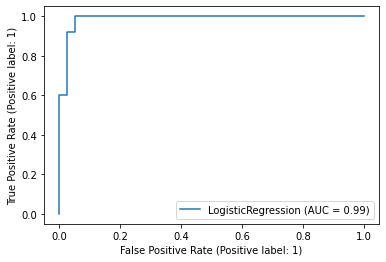

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, plot_roc_curve

X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
classifier = LogisticRegression().fit(X_train_scaled, y_train)

# 1.
y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)

# testing
print(y_pred_train[:10])
print(y_pred_test[:10])
print('----------------')

# 2.
# train
print('f1 score train', f1_score(y_train, y_pred_train))
print('accuracy train', accuracy_score(y_train, y_pred_train))
print('recall train', recall_score(y_train, y_pred_train))
print('precision train', precision_score(y_train, y_pred_train))
print('roc_auc train', roc_auc_score(y_train, y_pred_train))
print('------------')

# test
print('f1 score test', f1_score(y_test, y_pred_test))
print('accuracy test', accuracy_score(y_test, y_pred_test))
print('recall test', recall_score(y_test, y_pred_test))
print('precision test', precision_score(y_test, y_pred_test))
print('roc_auc test', roc_auc_score(y_test, y_pred_test))

print('confusion matrix', confusion_matrix(y_test, y_pred_test))

# 3.
plot_roc_curve(classifier, X_test_scaled, y_test)
